# Exploratory Data Analysis for Airbnb

The Airbnb data obtained is from Seattle in 2016. The purpose is to understand how the market behaves in 2016 to know what to expect. Also, learn the average price per property type, which property type has more demands through the year, identify any high and low seasons for the market, and see if I include the cleaning fee. Will this impact the booking demand? Answering this question will help us understand more the Airbnb market and know which area or property type will be more convenient.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/Airbnb_EDA.csv')
dfc = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/Calendar_EDA.csv')
dfc2 = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/Calendar2_EDA.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3817 non-null   int64  
 1   id                         3817 non-null   int64  
 2   property_type              3817 non-null   object 
 3   room_type                  3817 non-null   object 
 4   price                      3817 non-null   float64
 5   cleaning_fee               3817 non-null   float64
 6   availability_30            3817 non-null   int64  
 7   review_scores_rating       3817 non-null   float64
 8   review_scores_cleanliness  3817 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 268.5+ KB


## Have Airbnb high and low season, or is it consistent throughout the year? 

In [4]:
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1393570 non-null  int64  
 1   id             1393570 non-null  int64  
 2   date           1393570 non-null  object 
 3   available      1393570 non-null  int64  
 4   price_x        1393570 non-null  float64
 5   property_type  1393205 non-null  object 
 6   price_y        1393205 non-null  float64
 7   cleaning_fee   1393205 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 85.1+ MB


In [5]:
dfc2['date'] = pd.to_datetime(dfc2['date'])
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Unnamed: 0     1393570 non-null  int64         
 1   id             1393570 non-null  int64         
 2   date           1393570 non-null  datetime64[ns]
 3   available      1393570 non-null  int64         
 4   price_x        1393570 non-null  float64       
 5   property_type  1393205 non-null  object        
 6   price_y        1393205 non-null  float64       
 7   cleaning_fee   1393205 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 85.1+ MB


In [6]:
week = dfc2.resample('W', on= 'date').available.sum().reset_index()
month = dfc2.resample('M', on= 'date').available.sum().reset_index()
quarter = dfc2.resample('Q', on= 'date').available.sum().reset_index()

In [7]:
w= px.line(week, x= 'date', y= 'available', height=300, width=700)
w.update_layout(title='Weekly Availability')
w.show()

In [8]:
m= px.line(month, x= 'date', y= 'available', height=300, width=00)
m.update_layout(title='Monthly Availability')
m.show()

In [9]:
q= px.line(quarter, x= 'date', y= 'available', height=300, width=600)
q.update_layout(title='Quarterly Availability')
q.show()

Plotting the demand weekly, monthly, and quarterly seems that Airbnb is consistent throughout the entire year. It drops after 2017, but this could be happening for lack of 2017 data. 

## Comparing Property types prices

In [10]:
df.describe()

,Unnamed: 0,id,price,cleaning_fee,availability_30,review_scores_rating,review_scores_cleanliness
count,3817.000000,3.817000e+03,3817.000000,3817.000000,3817.000000,3817.000000,3817.000000
mean,1908.427823,5.551565e+06,127.978255,45.055017,16.790673,78.539167,7.924024
std,1102.441391,2.961687e+06,90.261754,49.917984,12.172198,35.961313,3.669523
min,0.000000,4.291000e+03,20.000000,0.000000,0.000000,0.000000,0.000000
25%,954.000000,3.258386e+06,75.000000,0.000000,2.000000,87.000000,9.000000
50%,1908.000000,6.118291e+06,100.000000,30.000000,20.000000,95.000000,10.000000
75%,2863.000000,8.035212e+06,150.000000,65.000000,30.000000,98.000000,10.000000
max,3817.000000,1.034016e+07,1000.000000,300.000000,30.000000,100.000000,10.000000


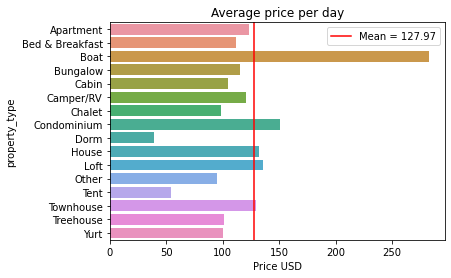

In [11]:
df_type = df.groupby('property_type').price.mean().reset_index()

sns.barplot(data= df_type, x= 'price', y='property_type')
plt.axvline(x=127.97, color='red',label='Mean = 127.97')
plt.title('Average price per day')
plt.xlabel('Price USD')
plt.legend()

The bar plot shows the boats are the most expensive compared to the rest of the properties. The price average is $127.97 per booking. I'm interested to see how the average change if we take off the boat property.  

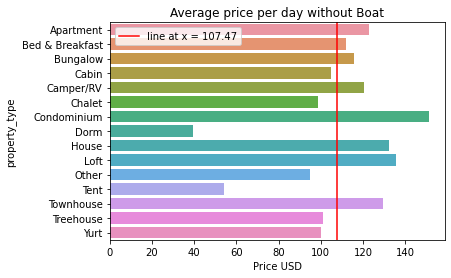

In [12]:
df_type2 = df_type[df_type['property_type'] != 'Boat']

sns.barplot(data= df_type2, x= 'price', y='property_type')
plt.axvline(x=df_type2['price'].mean(), color='red',label='line at x = {}'.format(round(df_type2['price'].mean(), 2)))
plt.title('Average price per day without Boat')
plt.xlabel('Price USD')
plt.legend()

In [13]:
df_type.groupby('property_type').price.mean()

property_type
Apartment          122.932670
Bed & Breakfast    112.054054
Boat               282.375000
Bungalow           115.615385
Cabin              104.666667
Camper/RV          120.461538
Chalet              98.500000
Condominium        151.109890
Dorm                39.500000
House              132.351414
Loft               135.700000
Other               94.681818
Tent                54.000000
Townhouse          129.457627
Treehouse          101.000000
Yurt               100.000000
Name: price, dtype: float64

After taking off the boar property, the price average decrease by $20.30 per booking, and now the Condominium has the highest booking price. The dorm and tent are the lowest prices per booking.

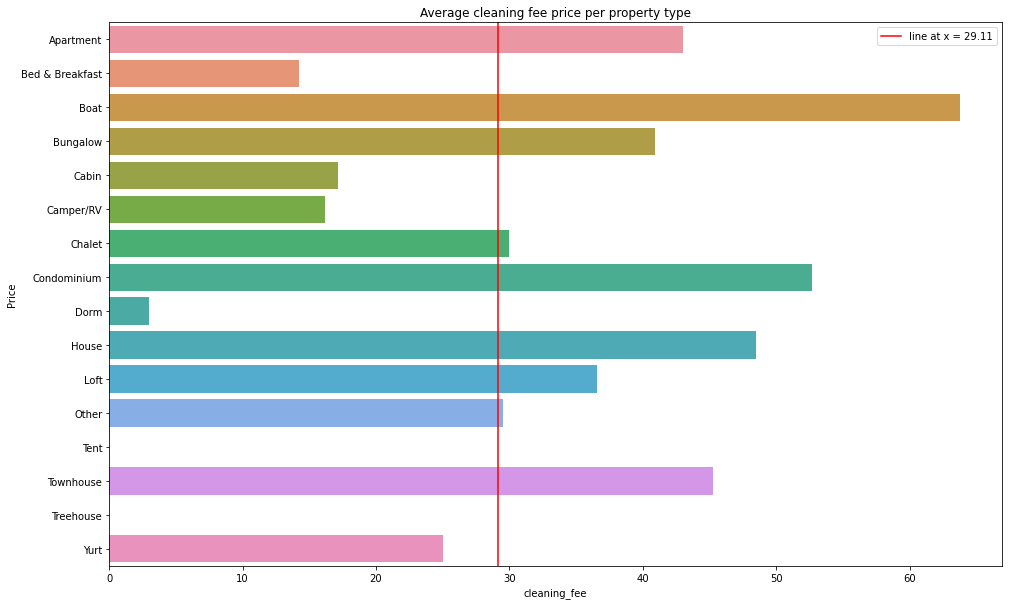

In [14]:
dfc2_c = dfc2.groupby(by= ['date', 'property_type']).cleaning_fee.mean().reset_index()
plt.figure(figsize=(16,10))
plt.title('Average cleaning fee price per property type')
sns.barplot(data=dfc2_c, x='cleaning_fee', y= 'property_type')
plt.axvline(x=dfc2_c['cleaning_fee'].mean(), color='red',label='line at x = {}'.format(round(dfc2_c['cleaning_fee'].mean(), 2)))
plt.ylabel('Price')
plt.legend()

In [15]:
dfc2.groupby('property_type').cleaning_fee.mean()

property_type
Apartment          42.984192
Bed & Breakfast    14.189189
Boat               63.750000
Bungalow           40.923077
Cabin              17.142857
Camper/RV          16.153846
Chalet             30.000000
Condominium        52.692308
Dorm                3.000000
House              48.515868
Loft               36.575000
Other              29.545455
Tent                0.000000
Townhouse          45.288136
Treehouse           0.000000
Yurt               25.000000
Name: cleaning_fee, dtype: float64

## Let's move on to see how is the demand per property type in 2016.

In [16]:
dfc2['date'] = pd.to_datetime(dfc2['date'])
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Unnamed: 0     1393570 non-null  int64         
 1   id             1393570 non-null  int64         
 2   date           1393570 non-null  datetime64[ns]
 3   available      1393570 non-null  int64         
 4   price_x        1393570 non-null  float64       
 5   property_type  1393205 non-null  object        
 6   price_y        1393205 non-null  float64       
 7   cleaning_fee   1393205 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 85.1+ MB


In [17]:
dfc2_g = dfc2.groupby(by= ['date', 'property_type']).price_x.sum().reset_index()
fig = px.line(dfc2_g, x='date', y= 'price_x', color='property_type', height=500, width=950)
fig.update_layout(title= 'Total earning per property type', yaxis_title= 'Total booking per day ($)', xaxis_title= 'Date' )
fig.show()

In [18]:
dfc2_a = dfc2.groupby(by= ['date', 'property_type']).available.sum().reset_index()
fig2 = px.line(dfc2_a, x='date', y= 'available', color='property_type', height=500, width=950)
fig2.update_layout(title= 'Total Demand per property type', yaxis_title= 'Total booking per day', xaxis_title= 'Date' )
fig2.show()


The line plot seems like the houses, and the apartments were the most used and most earning in 2016. The rest of the properties don't pass $25,000 in revenue in the entire year. It also seems a trend where the gains and the bookings drop every first of each month. 
It is more convenient to have a house and an Apartment to put on the Airbnb market. 

Now we know the Apartments and houses are the most demanded throughout the entire 2016. The house's booking price is on average 132.35 USD with 48.51 USD of a cleaning fee, and the apartment has an average cost of 112.93 USD per booking and 42.98 USD of a cleaning fee.

## Studying correlations between features

Now that we know the most profitable through the year are apartments and houses. So, let's see the correlation between features and then focus on apartments and house properties to understand how the cleaning fee influences the monthly availability and the booking price per day.

In [19]:
df.corr()

,Unnamed: 0,id,price,cleaning_fee,availability_30,review_scores_rating,review_scores_cleanliness
Unnamed: 0,1.000000,0.010412,-0.076729,-0.102759,0.013818,-0.021233,-0.024570
id,0.010412,1.000000,-0.046354,-0.122490,-0.068792,-0.388079,-0.381557
price,-0.076729,-0.046354,1.000000,0.576465,-0.037694,-0.020001,-0.017049
cleaning_fee,-0.102759,-0.122490,0.576465,1.000000,0.036053,0.056303,0.070936
availability_30,0.013818,-0.068792,-0.037694,0.036053,1.000000,0.023785,0.033748
review_scores_rating,-0.021233,-0.388079,-0.020001,0.056303,0.023785,1.000000,0.982421
review_scores_cleanliness,-0.024570,-0.381557,-0.017049,0.070936,0.033748,0.982421,1.000000


In [20]:
hm = px.imshow(df.corr())
hm.update_layout(title= 'Heatmap')
hm.show()

In [21]:
reg = px.scatter(df, x= 'price', y= 'cleaning_fee', trendline="ols")
reg.update_layout(title= 'Price vs Cleaning Fee', yaxis_title= 'Cleaning Fee per Booking', xaxis_title= 'Booking Price per day')
reg.show()

The heatmap shows the strongest correlation between the cleaning fee and booking price with a 57% probability, but this correlation is moderate. The regression plot exhibits the highest booking price per day the highest cleaning fee per booking can be. But, still, the correlation is mild, meaning not always is the case. 

### Apartment Property

In [22]:
apartment = df[df['property_type'] == 'Apartment']
del apartment['property_type']
apartment = apartment.rename(columns={'price': 'apa_cost', 'cleaning_fee': 'apa_clean_fee'})
apartment.head(2)

,Unnamed: 0,id,room_type,apa_cost,apa_clean_fee,availability_30,review_scores_rating,review_scores_cleanliness
0,0,241032,Entire home/apt,85.0,0.0,14,95.0,10.0
1,1,953595,Entire home/apt,150.0,40.0,13,96.0,10.0


In [23]:
apartment.corr()

,Unnamed: 0,id,apa_cost,apa_clean_fee,availability_30,review_scores_rating,review_scores_cleanliness
Unnamed: 0,1.000000,0.044438,-0.048948,-0.075837,-0.005753,-0.015239,-0.022961
id,0.044438,1.000000,-0.136410,-0.221041,-0.119235,-0.391266,-0.389235
apa_cost,-0.048948,-0.136410,1.000000,0.431814,0.085598,0.033907,0.037833
apa_clean_fee,-0.075837,-0.221041,0.431814,1.000000,0.173199,0.101521,0.129799
availability_30,-0.005753,-0.119235,0.085598,0.173199,1.000000,0.054627,0.070387
review_scores_rating,-0.015239,-0.391266,0.033907,0.101521,0.054627,1.000000,0.980238
review_scores_cleanliness,-0.022961,-0.389235,0.037833,0.129799,0.070387,0.980238,1.000000


In [24]:
hm2 = px.imshow(apartment.corr())
hm2.update_layout(title= 'Apartment Heatmap')
hm2.show()

In [25]:
fig3 = px.scatter(apartment, x= 'apa_clean_fee', y= 'apa_cost', trendline="ols")
fig3.update_layout(title= 'Apartment price vs Apartment Cleaning Fee', yaxis_title= 'Booking Price per day', xaxis_title= 'Cleaning Fee per Booking')
fig3.show()

In [27]:
fig4 = px.scatter(apartment, x= 'apa_clean_fee', y= 'availability_30', trendline="ols")
fig4.update_layout(title= 'Apartment booking per day vs Apartment Cleaning Fee', yaxis_title= 'Booking per day', xaxis_title= 'Cleaning Fee per Booking')
fig4.show()

Studying the apartment property correlations, I found the cleaning fee does not significantly affect any feature. The highest correlation is with booking cost per day with a 0.43, which is a weak correlation.

### House Property

In [22]:
house = df[df['property_type'] == 'House']
del house['property_type']
house.head(2)

,Unnamed: 0,id,room_type,price,cleaning_fee,availability_30,review_scores_rating,review_scores_cleanliness
2,2,3308979,Entire home/apt,975.0,300.0,1,97.0,10.0
4,4,278830,Entire home/apt,450.0,125.0,30,92.0,9.0


In [23]:
house.corr()

,Unnamed: 0,id,price,cleaning_fee,availability_30,review_scores_rating,review_scores_cleanliness
Unnamed: 0,1.000000,0.013644,-0.095886,-0.122375,0.046430,-0.040071,-0.038145
id,0.013644,1.000000,-0.009829,-0.070635,-0.027271,-0.379765,-0.368644
price,-0.095886,-0.009829,1.000000,0.644213,-0.129965,-0.039081,-0.035397
cleaning_fee,-0.122375,-0.070635,0.644213,1.000000,-0.069446,0.025274,0.034856
availability_30,0.046430,-0.027271,-0.129965,-0.069446,1.000000,-0.015359,-0.008278
review_scores_rating,-0.040071,-0.379765,-0.039081,0.025274,-0.015359,1.000000,0.981276
review_scores_cleanliness,-0.038145,-0.368644,-0.035397,0.034856,-0.008278,0.981276,1.000000


In [24]:
hm2 = px.imshow(house.corr())
hm2.update_layout(title= 'House Heatmap')
hm2.show()

In [25]:
fig5 = px.scatter(house, x= 'cleaning_fee', y= 'availability_30', trendline="ols")
fig5.update_layout(title= 'Houses booking per day vs Houses Cleaning Fee', yaxis_title= 'Booking per day', xaxis_title= 'Cleaning Fee per Booking')
fig5.show()

In [26]:
fig6 = px.scatter(house, x= 'cleaning_fee', y= 'price', trendline="ols")
fig6.update_layout(title= 'Houses booking price per day vs Houses Cleaning Fee', yaxis_title= 'Booking price per day', xaxis_title= 'Cleaning Fee per Booking')
fig6.show()

Studying the house's property correlations, I found the cleaning fee does not significantly affect any feature except the booking price per day with a 0.64, which is a moderate correlation. The regression plot between cleaning fee and booking price per day shows a trend indicating the highest the booking price is, the highest the cleaning fee is. Still, again, this is a moderate correlation, meaning is not always the case. 